# **Fuzzy Logic (Mamdani) in Air Purrifier**

Name : `Anak Agung Istri Istadewanti`

NRP : `5026211143`

Class : `Soft Computing (Q)`

## Set Up

In [1]:
# Install library
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 5.8 MB/s eta 0:00:00


In [2]:
# Import libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Define Input and Output



In [3]:
# Define input variables (Antecedent)
airQuality = ctrl.Antecedent(np.arange(0, 401, 1), 'airQuality')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(10, 41, 1), 'temperature')

# Define output variable (Consequent)
fanSpeed = ctrl.Consequent(np.arange(0, 101, 1), 'fanSpeed')

## Define Membership Functions (MFs) for Every Input and Output

Membership functions define how each input/output is categorized into fuzzy sets.

In [4]:
# Membership Functions (MFs) for Air Quality
airQuality['good'] = fuzz.trapmf(airQuality.universe, [0, 0, 10, 15])
airQuality['moderate'] = fuzz.trapmf(airQuality.universe, [15, 20, 60, 65])
airQuality['unhealthy'] = fuzz.trapmf(airQuality.universe, [65, 70, 140, 150])
airQuality['veryUnhealthy'] = fuzz.trapmf(airQuality.universe, [150, 160, 240, 250])
airQuality['hazardous'] = fuzz.trapmf(airQuality.universe, [250, 260, 400, 400])

# Membership Functions (MFs) for Humidity
humidity['tooDry'] = fuzz.trapmf(humidity.universe, [0, 0, 40, 45])
humidity['ideal'] = fuzz.trimf(humidity.universe, [45, 50, 60])
humidity['tooHumid'] = fuzz.trapmf(humidity.universe, [60, 65, 100, 100])

# Membership Functions (MFs) for Temperature
temperature['cold'] = fuzz.trapmf(temperature.universe, [10, 10, 15, 20])
temperature['cool'] = fuzz.trimf(temperature.universe, [15, 20, 25])
temperature['neutral'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['warm'] = fuzz.trimf(temperature.universe, [25, 30, 35])
temperature['hot'] = fuzz.trapmf(temperature.universe, [30, 35, 40, 40])

# Membership Functions (MFs) for Fan Speed
fanSpeed['low'] = fuzz.trapmf(fanSpeed.universe, [0, 0, 20, 40])
fanSpeed['medium'] = fuzz.trimf(fanSpeed.universe, [30, 50, 70])
fanSpeed['high'] = fuzz.trapmf(fanSpeed.universe, [60, 80, 100, 100])

## Define Fuzzy Rules

Fuzzy rules govern how input conditions relate to outputs, like:

> "If Air Quality is good and Humidity is ideal, then Fan Speed is low."



In [5]:
# Define the fuzzy rules

rules = []
for air in ['good', 'moderate', 'unhealthy', 'veryUnhealthy', 'hazardous']:
    for hum in ['tooDry', 'ideal', 'tooHumid']:
        for temp in ['cold', 'cool', 'neutral', 'warm', 'hot']:
            if air == 'good' or hum == 'ideal' or temp == 'neutral':
                rules.append(ctrl.Rule(airQuality[air] & humidity[hum] & temperature[temp], fanSpeed['low']))
            elif air == 'moderate' or hum == 'tooDry' or temp == 'cool':
                rules.append(ctrl.Rule(airQuality[air] & humidity[hum] & temperature[temp], fanSpeed['medium']))
            else:
                rules.append(ctrl.Rule(airQuality[air] & humidity[hum] & temperature[temp], fanSpeed['high']))

## Apply Fuzzy Rules

The fuzzy logic system applies the defined rules to evaluate how each rule's conditions are met based on the input membership functions.

In [6]:
# Apply rules to control system
fanSpeed_ctrl = ctrl.ControlSystem(rules)
fanSpeed_sim = ctrl.ControlSystemSimulation(fanSpeed_ctrl)

## Compute and Give Output Label

After applying the rules, defuzzification computes a numerical output (e.g., fan speed). This value is then labeled according to the output's membership function (e.g., low, medium, high).

In [7]:
# Example Input: Air Quality = 100 (Unhealthy), Humidity = 55 (Ideal), Temperature = 30 (Neutral)
fanSpeed_sim.input['airQuality'] = 100
fanSpeed_sim.input['humidity'] = 55
fanSpeed_sim.input['temperature'] = 30

In [8]:
# Compute the output
fanSpeed_sim.compute()

# Get the output fan speed value
fanSpeed_value = fanSpeed_sim.output['fanSpeed']

# Define a descriptive label based on the output fan speed value
if fanSpeed_value <= 40:
    fanSpeed_label = 'Low'
elif fanSpeed_value <= 70:
    fanSpeed_label = 'Medium'
else:
    fanSpeed_label = 'High'

# Print the output fan speed and its descriptive label
print(f"Fan Speed: {fanSpeed_value:.2f}")
print(f"Fan Speed (Description): {fanSpeed_label}")

Fan Speed: 17.62
Fan Speed (Description): Low


## Visualizing the Results

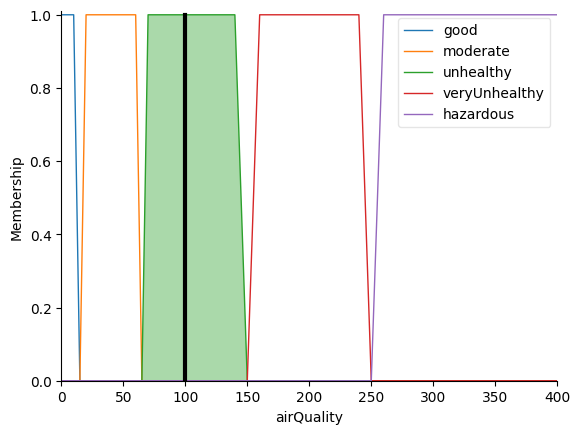

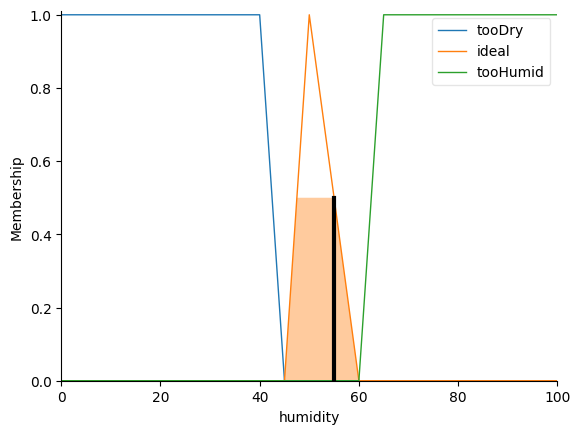

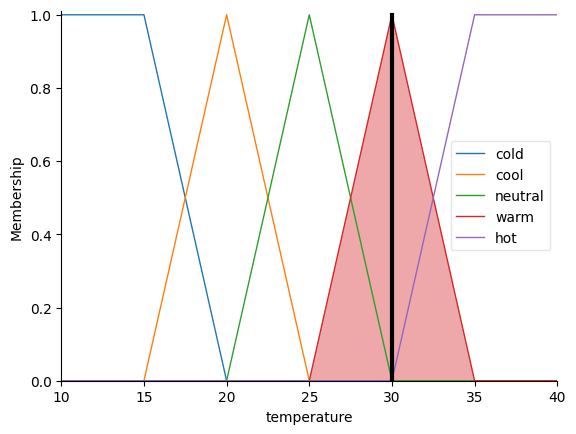

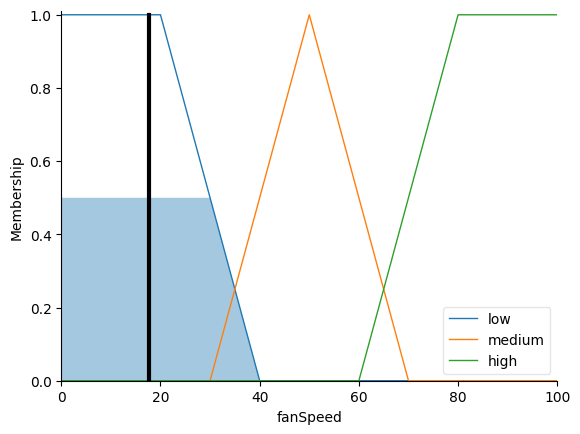

In [10]:
# Visualize the results
airQuality.view(sim=fanSpeed_sim)
humidity.view(sim=fanSpeed_sim)
temperature.view(sim=fanSpeed_sim)
fanSpeed.view(sim=fanSpeed_sim)

## Conclusion of the visualization above

The input fan speed is close to 20, meaning **the fan has partial membership in the low category**. This indicates that the fan speed is not fully considered "low" but is still within the range, with about half of the full membership value for the low speed category.